# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from dstapi import DstApi

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
#import dataproject

# Read and clean data

We will start by read and clean our data. In this project we investigate two datasets from Denmark Statistics: Life expectancy and the highest completed education across the provinces in Denmark.
We start by read and clean the dataset for the life expectancy, and afterwards we do it for the level of education.

In [2]:
#We start by loading the dataset for the life expectancy from Denmark Statistics.
hisb77_api = DstApi('HISB77') 
params = hisb77_api._define_base_params(language='en')
hisb77 = hisb77_api.get_data(params=params)
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
0,All Denmark,Women,2001:2002,79.2
1,All Denmark,Men,2002:2003,74.9
2,All Denmark,Total,2003:2004,77.5
3,All Denmark,Women,2005:2006,80.5
4,All Denmark,Men,2006:2007,76.0
...,...,...,...,...
823,Province Bornholm,Total,2014:2015,79.9
824,Province Nordjylland,Men,2010:2011,77.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [3]:
#We start by dropping the column "Men" and "women" in the column "Køn", since we do not want to look at the difference between the gender across the provinces.
hisb77 = hisb77[hisb77['KØN'] == 'Total']
# Display the modified dataset
display(hisb77)

,OMRÅDE,KØN,TID,INDHOLD
2,All Denmark,Total,2003:2004,77.5
5,All Denmark,Total,2007:2008,78.5
8,Province Byen København,Total,2002:2003,75.4
11,Province Byen København,Total,2006:2007,76.5
14,Province Københavns omegn,Total,2001:2002,76.8
...,...,...,...,...
814,Province Københavns omegn,Total,2010:2011,79.3
823,Province Bornholm,Total,2014:2015,79.9
825,All Denmark,Total,2013:2014,80.6
826,Province Nordjylland,Total,2010:2011,79.7


In [4]:
#Now we rename the variables.
hisb77.rename(columns = {'OMRÅDE':'Province', 'KØN':"Gender", 'TID':'year', 'INDHOLD':'Life expectancy'}, inplace=True)
hisb77.head(5)

,Province,Gender,year,Life expectancy
2,All Denmark,Total,2003:2004,77.5
5,All Denmark,Total,2007:2008,78.5
8,Province Byen København,Total,2002:2003,75.4
11,Province Byen København,Total,2006:2007,76.5
14,Province Københavns omegn,Total,2001:2002,76.8


In [5]:
#Now we sort the dataset by 'Province'.
hisb77_sorted = hisb77.sort_values(by=['Province', 'year'], inplace=True)
# Display the sorted dataset
display(hisb77)

,Province,Gender,year,Life expectancy
621,All Denmark,Total,2000:2001,76.9
415,All Denmark,Total,2001:2002,76.9
209,All Denmark,Total,2002:2003,77.2
2,All Denmark,Total,2003:2004,77.5
624,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
544,Province Østsjælland,Total,2018:2019,81.5
562,Province Østsjælland,Total,2019:2020,81.9
571,Province Østsjælland,Total,2020:2021,81.8
526,Province Østsjælland,Total,2021:2022,81.7


In [6]:
#We will now reset the index.
hisb77.reset_index(inplace=True, drop=True)
display(hisb77)

,Province,Gender,year,Life expectancy
0,All Denmark,Total,2000:2001,76.9
1,All Denmark,Total,2001:2002,76.9
2,All Denmark,Total,2002:2003,77.2
3,All Denmark,Total,2003:2004,77.5
4,All Denmark,Total,2004:2005,77.9
...,...,...,...,...
271,Province Østsjælland,Total,2018:2019,81.5
272,Province Østsjælland,Total,2019:2020,81.9
273,Province Østsjælland,Total,2020:2021,81.8
274,Province Østsjælland,Total,2021:2022,81.7


In [7]:
#Now we delete the column "Køn".
drop_these = ['Gender']
print(drop_these)
hisb77.drop(drop_these, axis=1, inplace=True)
display(hisb77)

['Gender']


,Province,year,Life expectancy
0,All Denmark,2000:2001,76.9
1,All Denmark,2001:2002,76.9
2,All Denmark,2002:2003,77.2
3,All Denmark,2003:2004,77.5
4,All Denmark,2004:2005,77.9
...,...,...,...
271,Province Østsjælland,2018:2019,81.5
272,Province Østsjælland,2019:2020,81.9
273,Province Østsjælland,2020:2021,81.8
274,Province Østsjælland,2021:2022,81.7


In [8]:
# Split the "Year" column into separate start and end year columns
hisb77['Year'] = hisb77['year'].str.split(':').str[0]

# Drop the original "Year" column
hisb77 = hisb77.drop(columns=['year'])
display(hisb77)

,Province,Life expectancy,Year
0,All Denmark,76.9,2000
1,All Denmark,76.9,2001
2,All Denmark,77.2,2002
3,All Denmark,77.5,2003
4,All Denmark,77.9,2004
...,...,...,...
271,Province Østsjælland,81.5,2018
272,Province Østsjælland,81.9,2019
273,Province Østsjælland,81.8,2020
274,Province Østsjælland,81.7,2021


We will now load and clean the dataset for the highest completed education across provinces in Denmark.

In [9]:
#We load the data for highest completed education
education = pd.read_excel('HFUDD11.xlsx')
display(education)

,"Educational attainment (15-69 years) by time, region and highest education completed",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Units: Number,NaN,NaN,NaN,NaN
1,NaN,NaN,Total,H70 Masters programs,Proportion
2,2022,All Denmark,4093404,470853,0.115027
3,NaN,Province Byen København,623705,148355,0.237861
4,NaN,Province Københavns omegn,382522,56632,0.148049
5,NaN,Province Nordsjælland,308911,44688,0.144663
6,NaN,Province Bornholm,25567,1357,0.053076
7,NaN,Province Østsjælland,172688,18254,0.105705
8,NaN,Province Vest- og Sydsjælland,398334,19881,0.04991
9,NaN,Province Fyn,345607,29067,0.084104


In [10]:
#Skipping the 2 first rows and the two last rows
education = pd.read_excel('HFUDD11.xlsx', skiprows=2)
education = education[:-2]
display(education)

,Unnamed: 0,Unnamed: 1,Total,H70 Masters programs,Proportion
0,2022,All Denmark,4093404.0,470853.0,0.115027
1,NaN,Province Byen København,623705.0,148355.0,0.237861
2,NaN,Province Københavns omegn,382522.0,56632.0,0.148049
3,NaN,Province Nordsjælland,308911.0,44688.0,0.144663
4,NaN,Province Bornholm,25567.0,1357.0,0.053076
5,NaN,Province Østsjælland,172688.0,18254.0,0.105705
6,NaN,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,NaN,Province Fyn,345607.0,29067.0,0.084104
8,NaN,Province Sydjylland,493289.0,31048.0,0.062941
9,NaN,Province Østjylland,648173.0,75017.0,0.115736


In [11]:
#Dropping the first column
drop_these = ['Unnamed: 0']
print(drop_these)
education.drop(drop_these, axis=1, inplace=True)
display(education)

['Unnamed: 0']


,Unnamed: 1,Total,H70 Masters programs,Proportion
0,All Denmark,4093404.0,470853.0,0.115027
1,Province Byen København,623705.0,148355.0,0.237861
2,Province Københavns omegn,382522.0,56632.0,0.148049
3,Province Nordsjælland,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province Østsjælland,172688.0,18254.0,0.105705
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province Sydjylland,493289.0,31048.0,0.062941
9,Province Østjylland,648173.0,75017.0,0.115736


In [12]:
#Now we rename the variables.
education.rename(columns = {'Unnamed: 1':'Province', 'Total':"Total education", 'H70 Masters programs':'Masters programs', 'Proportion':'Proportion with a Master program'}, inplace=True)
display(education)

,Province,Total education,Masters programs,Proportion with a Master program
0,All Denmark,4093404.0,470853.0,0.115027
1,Province Byen København,623705.0,148355.0,0.237861
2,Province Københavns omegn,382522.0,56632.0,0.148049
3,Province Nordsjælland,308911.0,44688.0,0.144663
4,Province Bornholm,25567.0,1357.0,0.053076
5,Province Østsjælland,172688.0,18254.0,0.105705
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910
7,Province Fyn,345607.0,29067.0,0.084104
8,Province Sydjylland,493289.0,31048.0,0.062941
9,Province Østjylland,648173.0,75017.0,0.115736


In [13]:
# Add a column with year 2022, which is the year of the data
education['Year'] = 2022
display(education)

,Province,Total education,Masters programs,Proportion with a Master program,Year
0,All Denmark,4093404.0,470853.0,0.115027,2022
1,Province Byen København,623705.0,148355.0,0.237861,2022
2,Province Københavns omegn,382522.0,56632.0,0.148049,2022
3,Province Nordsjælland,308911.0,44688.0,0.144663,2022
4,Province Bornholm,25567.0,1357.0,0.053076,2022
5,Province Østsjælland,172688.0,18254.0,0.105705,2022
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910,2022
7,Province Fyn,345607.0,29067.0,0.084104,2022
8,Province Sydjylland,493289.0,31048.0,0.062941,2022
9,Province Østjylland,648173.0,75017.0,0.115736,2022


## Explore each data set

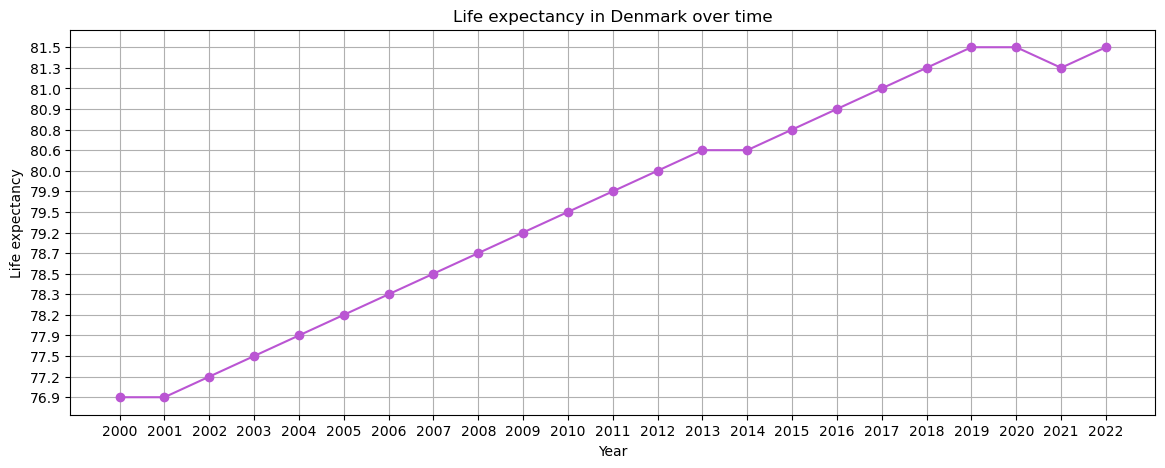

In [14]:
# Filter the dataset for only "All Denmark"
all_denmark_data = hisb77[hisb77['Province'] == 'All Denmark'].copy()

# Split the "Year" column to separate start and end years
#all_denmark_data[['Start Year', 'End Year']] = all_denmark_data['Year'].str.split(':', expand=True)

# Convert columns to numeric values
#all_denmark_data.loc[:, 'Start Year'] = all_denmark_data['Start Year'].astype(int)
#all_denmark_data.loc[:, 'End Year'] = all_denmark_data['End Year'].astype(int)

# Plot the curve diagram
plt.figure(figsize=(14, 5))
plt.plot(all_denmark_data['Year'], all_denmark_data['Life expectancy'], marker='o', color='mediumorchid')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.title('Life expectancy in Denmark over time')
plt.grid(True)
plt.show()

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [15]:
# Convert 'Life expectancy' column to numeric
hisb77['Life expectancy'] = pd.to_numeric(hisb77['Life expectancy'])

# Group data by year and province
grouped_data = hisb77.groupby(['Year', 'Province'])['Life expectancy'].mean().unstack()

# Create function to update plot
def update_plot(year):
    if year in grouped_data.index:
        plt.figure(figsize=(10, 6))
        grouped_data.loc[year].plot(kind='bar', color='mediumorchid')
        plt.ylabel('Life expectancy')
        plt.title(f'Life expectancy by province in {year}')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(75, 82.5)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data available for the selected year: {year}")

# Create a dropdown widget for selecting years
year_dropdown = widgets.Dropdown(
    options=hisb77['Year'].unique(),
    description='Year:',
    disabled=False,
)

# Create an interactive plot
interactive_plot = widgets.interactive(update_plot, year=year_dropdown)

# Display the interactive plot
display(interactive_plot)


interactive(children=(Dropdown(description='Year:', options=('2000', '2001', '2002', '2003', '2004', '2005', '…

Explain what you see when moving elements of the interactive plot around. !!!!!!!

We now make a bar chart of the proportion of Master degree holders across the provinces in Denmark.

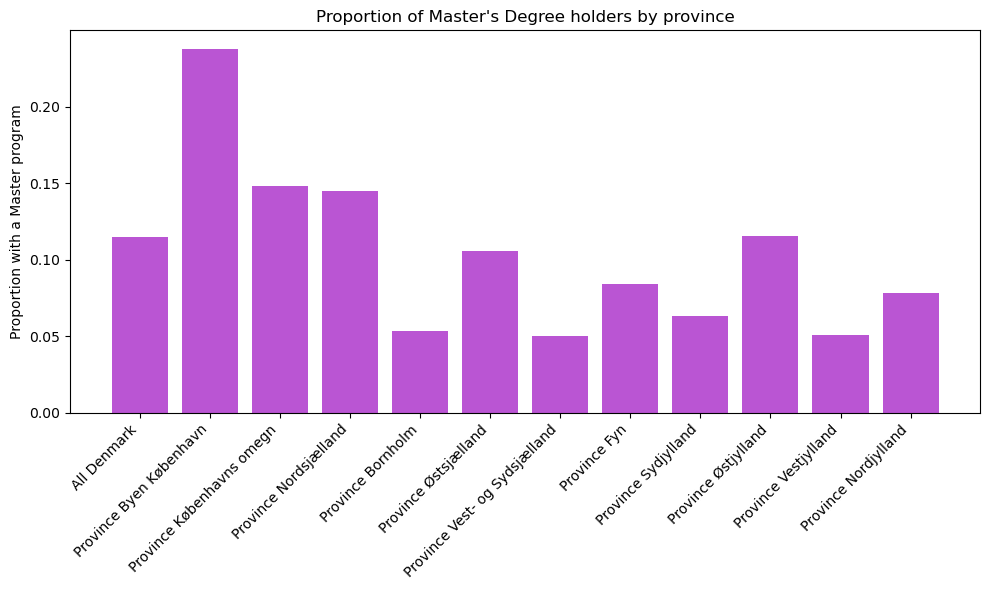

In [16]:
# Plot
plt.figure(figsize=(10, 6))
plt.bar(education['Province'], education['Proportion with a Master program'], color='mediumorchid')
plt.ylabel('Proportion with a Master program')
plt.title('Proportion of Master\'s Degree holders by province')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here, we see that the Province of the city Copenhagen has the highest proportion with a Master degree. The Province Vest- og Sydsjælland has the lowest degree of people with a master program.

# Merge data sets

To merge the two datasets we make an left join. We dot this because we want all the data from the education file and to drop the data from hisb77 which is not from 2022. 

In [17]:
# Convert the 'Year' column to the same data type in the education DataFrame
education['Year'] = education['Year'].astype(str)

# Convert the 'Year' column to the same data type in the hisb77 DataFrame
hisb77['Year'] = hisb77['Year'].astype(str)

#Merging the teo datasets
education_with_hisb77=pd.merge(education, hisb77, on=['Province', 'Year'], how='left')
display(education_with_hisb77)

,Province,Total education,Masters programs,Proportion with a Master program,Year,Life expectancy
0,All Denmark,4093404.0,470853.0,0.115027,2022,81.5
1,Province Byen København,623705.0,148355.0,0.237861,2022,81.2
2,Province Københavns omegn,382522.0,56632.0,0.148049,2022,81.9
3,Province Nordsjælland,308911.0,44688.0,0.144663,2022,82.2
4,Province Bornholm,25567.0,1357.0,0.053076,2022,80.4
5,Province Østsjælland,172688.0,18254.0,0.105705,2022,82.0
6,Province Vest- og Sydsjælland,398334.0,19881.0,0.049910,2022,80.2
7,Province Fyn,345607.0,29067.0,0.084104,2022,81.4
8,Province Sydjylland,493289.0,31048.0,0.062941,2022,81.5
9,Province Østjylland,648173.0,75017.0,0.115736,2022,82.0


# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.